# Final Project

For the following project, you will be working with a movie dataset. The dataset is [here](https://drive.google.com/file/d/1R53inu8Jcb9GGoyiuVnBMVnO7XvCaJAE/view?usp=drive_link). The dataset columns are as follows:

* Title: The movie's title
* Genre: The movie's genre
* Stars: The number of famous actors in the movie
* Runtime: The length of the movie's runtime
* Budget: How much was spent on filming the movie (in millions)
* Promo: How much money was spent promoting the movie (in millions)
* Season: The season in which the movie was released
* Rating: The movie's rating
* R1: Reviewer 1's review
* R1: Reviewer 2's review
* R1: Reviewer 3's review

And the target variable:

* Success: Whether the film was a success or a flop

Fill in the answers to questions in the text field, and show your code below.

# Data loading

Load the data

In [112]:
import pandas as pd
import numpy as np
import scipy as sp

In [113]:
df = pd.read_csv("/content/CMSC320FinalProjectData.csv")

# Data Cleaning

List the three biggest data errors below, with a summary of how you fixed them and why you choose that method:


*
*
*

In [114]:
df.columns

Index(['Unnamed: 0', 'Title', 'Runtime', 'Stars', 'Year', 'Budget', 'Promo',
       'Season', 'Rating', 'Genre', 'R1', 'R2', 'R3', 'Success'],
      dtype='object')

One of the biggest data errors was certain movies having a runtime of 0 minutes. To fix this I thought it would be appropriate to perform a mode imputation with the runtimes for the specific genre that the given movie is in.

In [115]:
zero_runtime = df[df['Runtime'] == 0]

for index, row in zero_runtime.iterrows():
    genre = row['Genre']
    genre_mode = df[df['Genre'] == genre]['Runtime'].mode().values
    if len(genre_mode) > 0:
        df.at[index, 'Runtime'] = genre_mode[0]

Another data error was the budget not being represented in terms of millions. To fix this, I filtered the dataframe by entries that had the budget greater than 5000, then I applied a function that transformed the budget into terms of millions.

In [116]:
fildf = df[df["Budget"] > 5000]

def transform_to_millions(budget):
    return budget / 1000000

df.loc[fildf.index, 'Budget'] = fildf['Budget'].apply(transform_to_millions)

Lastly, a final error I found was some movies having 100 stars in them. Obviously this is not true, so I performed another mode imputation for this column that changed the stars from 100 to the mode of all the movies in the same genre.

In [117]:
hundred_stars = df[df['Stars'] == 100]

for index, row in hundred_stars.iterrows():
    genre = row['Genre']
    genre_mode = df[df['Genre'] == genre]['Stars'].mode().values
    if len(genre_mode) > 0:
        df.at[index, 'Stars'] = genre_mode[0]


# Data Exploration





Does Season have a stastically significant impact on a movie's success?

**p-value:** 0.0057

In [118]:
t = pd.crosstab(df["Season"], df["Success"])
t

Success,False,True
Season,,
Fall,90,23
Spring,88,10
Summer,149,58
Winter,95,27


In [119]:
stat, p, dof, freq = sp.stats.chi2_contingency(t)
p

0.005716268505111858

Yes, Season has a statistically significant impact on a movies success. According ot the p value of 0.0057, which is less than 0.05, the null hypothesis that there is no statistical significance can be rejected.

Do seasons have a statistically significant difference in their distribution of content ratings?

**p-value:** 0.215

In [120]:
t = pd.crosstab(df['Season'], df['Rating'])
stat, p, dof, freq = sp.stats.chi2_contingency(t)
p

0.21507814500508263

No, Season does not have a statistically significant impact on a movies distribution of content ratings. According ot the p value of 0.215, which is greater than 0.05, the null hypothesis that there is no statistical significance should not be rejected.

Who is the harshest critic (highest precent of negative reviews)?

**Critic:** R1_compound

In [121]:
# must do some weird NLP stuff

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

s = SentimentIntensityAnalyzer()

df['R1_scores'] = df['R1'].apply(lambda x: s.polarity_scores(x))
df['R2_scores'] = df['R2'].apply(lambda x: s.polarity_scores(x))
df['R3_scores'] = df['R3'].apply(lambda x: s.polarity_scores(x))

df['R1_tot'] = df['R1_scores'].apply(lambda x: x['compound'])
df['R2_tot'] = df['R2_scores'].apply(lambda x: x['compound'])
df['R3_tot'] = df['R3_scores'].apply(lambda x: x['compound'])

df['harshest_critic'] = df[['R1_tot', 'R2_tot', 'R3_tot']].idxmin(axis=1)

df['harshest_critic'].value_counts()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


R1_tot    248
R2_tot    164
R3_tot    128
Name: harshest_critic, dtype: int64

What is the covariance between promotional budget and the filming budget?

**Cov:** 1907.05

In [122]:
cov = df[['Budget', 'Promo']].cov()
cov.loc['Budget', 'Promo']

1907.0543228223628

# Data Visualization

Create a chart that compares the distribution of the budget for each different number of stars. (It does not need to be particularly appealing.

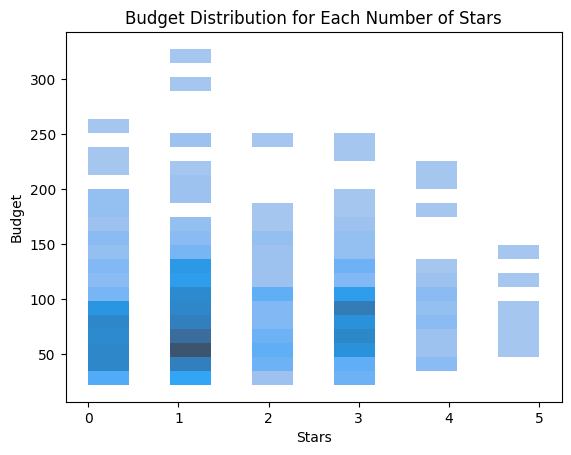

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x='Stars', y='Budget', data=df)
plt.title('Budget Distribution for Each Number of Stars')
plt.show()

Create a graph showing the average movie budget over time.

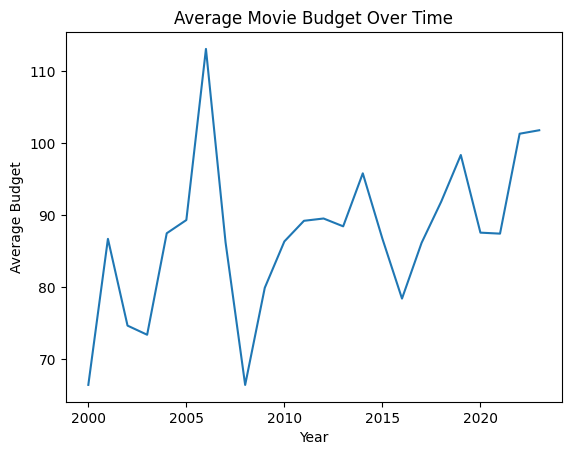

In [124]:
df_avg = df.groupby(df['Year'])['Budget'].mean().reset_index()
plt.plot(df_avg['Year'], df_avg['Budget'])
plt.title('Average Movie Budget Over Time')
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.show()

# Feature Engineering

List any features you choose to create (if you are creating many features based on one column, you do not need to list them separately.) You are not required to create any features if you do not wish to. You may create any number of additional features.


*
*

In [125]:
df = df.drop(["R1_scores","R2_scores", "R3_scores"], axis = 1)


In [126]:
df = pd.get_dummies(df, columns = ["Rating", "Season", "Genre"])


In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Year'] = scaler.fit_transform(df[["Year"]])
df['Runtime'] = scaler.fit_transform(df[["Runtime"]])
df['Budget'] = scaler.fit_transform(df[["Budget"]])
df['Promo'] = scaler.fit_transform(df[["Promo"]])

In [128]:
df = df.drop(['Title', 'R1', 'R2', 'R3',"harshest_critic", "Unnamed: 0"], axis=1)
df.columns

Index(['Runtime', 'Stars', 'Year', 'Budget', 'Promo', 'Success', 'R1_tot',
       'R2_tot', 'R3_tot', 'Rating_PG', 'Rating_PG13', 'Rating_R',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Genre_Action', 'Genre_Drama', 'Genre_Fantasy', 'Genre_Romantic Comedy',
       'Genre_Science fiction'],
      dtype='object')

# Modeling

Create a model of your choice.

**Model type choosen:** Random Forest

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

rf = RandomForestClassifier(max_depth = 10)

# Testing

Shuffle your data and break it into a 10% test set and 90% training set. Show your model's accuracy on the test set. In order to get full credit, the model's accuracy must be higher than 50%.

**Model accuracy:** 0.759

In [130]:
X = df.drop('Success', axis=1)
Y = df['Success']



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, train_size =0.9, random_state=0)
rf.fit(X_train, Y_train)

prob_preds = rf.predict_proba(X_test)
threshold = 0.23
Y_pred = [True if prob_preds[i][1]> threshold else False for i in range(len(prob_preds))]

#Y_pred = rf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7592592592592593

In [131]:
rf

RandomForestClassifier(max_depth=10)

Show the confusion matrix for your model. To get full credit, your false positive rate and false negative rate must be under 30%.


**False negative rate:** 0.143

**False positive rate:** 0.275

0.275
0.14285714285714285


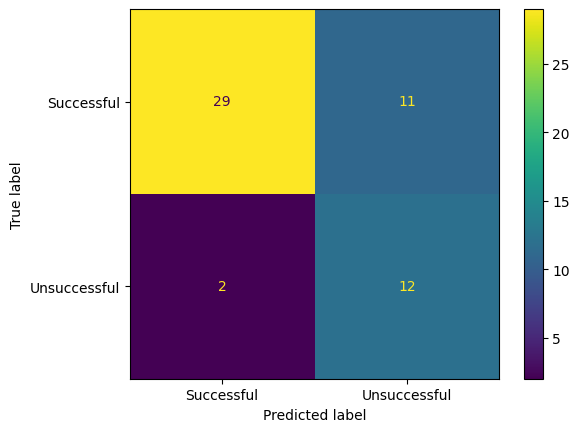

In [132]:
c = confusion_matrix(Y_test, Y_pred)
display = ConfusionMatrixDisplay(c, display_labels=['Successful', 'Unsuccessful'])
display.plot()

FP = c[0, 1]
FN = c[1, 0]
TP = c[1, 1]
TN = c[0, 0]


FPR = FP/(FP + TN)
FNR = FN/(FN + TP)

print(FPR)
print(FNR)

What was the most important feature for your model? Don't guess, either look up how to check or do your own tests.

**Most important feature:** R1_tot


20


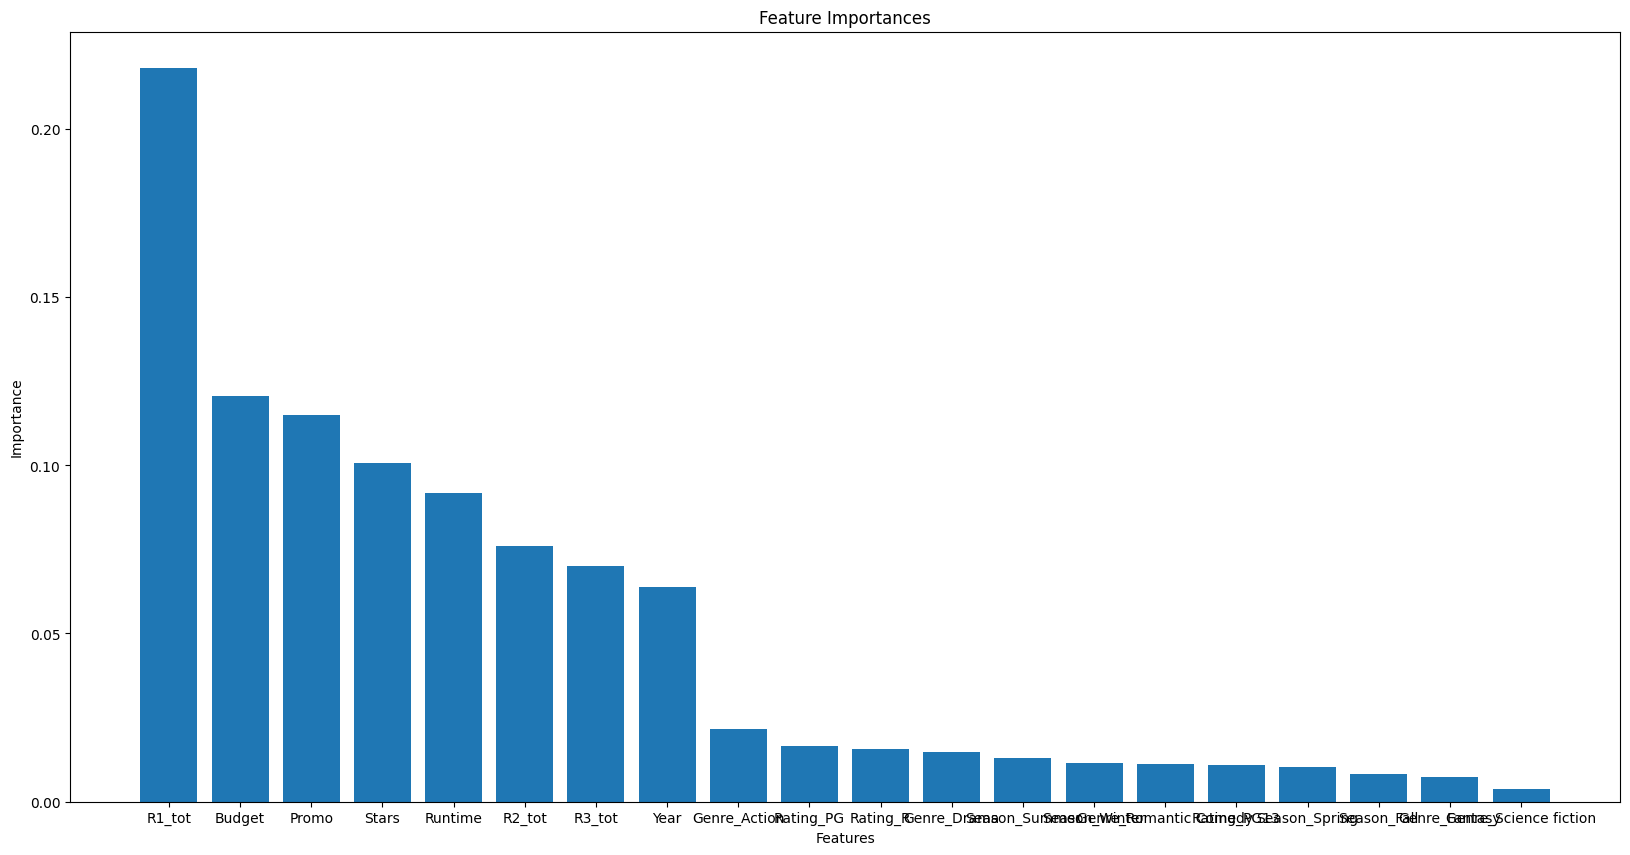

In [134]:
importances = rf.feature_importances_
df2 = df.drop("Success", axis=1)
print(len(df2.columns))

feature_names = df.columns
importances_df = pd.DataFrame({'feature': df2.columns, 'importance': importances})
importances_df = importances_df.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
plt.bar(importances_df['feature'], importances_df['importance'])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

